In [111]:
import numpy as np
import math

P_max = 0.00015
TX1_Power = 0.00010 # transfer power of TX1 in watt
TX1_fading_samples = 1000 # Number of fading samples in the channel between TX1 and RX1
RX1_Noise_Power = pow(10,-5) # Noise power in watt
TX1_Bandwidth = pow(10,3) # Bandwidth of the communication channel between TX1 and RX1
TX1_communication_time = 0.0003 # Communication time TX1-RX1

Harvesting_power_TX1 = P_max - TX1_Power  # Power that TX1 allocates for energy harvesting
EH_eta = 0.1 # power conversion efficiency
energy_harvesting_time = 0.0004
EH_fading_samples = 1000

TX2_fading_samples = 1000 # Number of fading samples in the channel between TX1 and RX1
RX2_Noise_Power = pow(10,-5) # Noise power in watt
TX2_Bandwidth = pow(10,3) # Bandwidth of the communication channel between TX1 and RX1
TX2_communication_time = 0.0003 # Communication time TX1-RX1

In [112]:
def FadingChannel(TX_Power, fading_samples):# Rayleigh fading model
    # Generate Rayleigh fading samples (complex Gaussian random variables)
    fading = np.random.normal(0, 1, fading_samples) + 1j * np.random.normal(0, 1, fading_samples)
    
    # Calculate received power
    received_power = TX_Power * np.abs(fading)**2
    
    # Calculate average received power
    RX_Power = np.mean(received_power)
    return RX_Power

In [113]:
def calculate_transferred_data(Received_Power, Noise_Power, Bandwidth, communication_time):
    SNR = Received_Power/Noise_Power
    Rate = Bandwidth * math.log2(1+SNR)
    Data = Rate * communication_time
    return SNR, Rate, Data  

In [114]:
def calculate_harvested_power(power, eta, EH_fading_samples):
    Harvested_power = eta * FadingChannel(power, EH_fading_samples)
    return Harvested_power

In [115]:
RX1_Power = FadingChannel(TX1_Power, TX1_fading_samples) # Received power in RX1

[SNR_RX1, Rate_RX1, Data_TX1] = calculate_transferred_data(RX1_Power, RX1_Noise_Power, TX1_Bandwidth, TX1_communication_time)

Harvested_power_TX1 = calculate_harvested_power(Harvesting_power_TX1, EH_eta, EH_fading_samples) # harvested energy at TX2

RX2_Power = FadingChannel(Harvested_power_TX1, TX2_fading_samples) # Received power in RX1

[SNR_RX2, Rate_RX2, Data_TX2] = calculate_transferred_data(RX2_Power, RX2_Noise_Power, TX2_Bandwidth, TX2_communication_time)

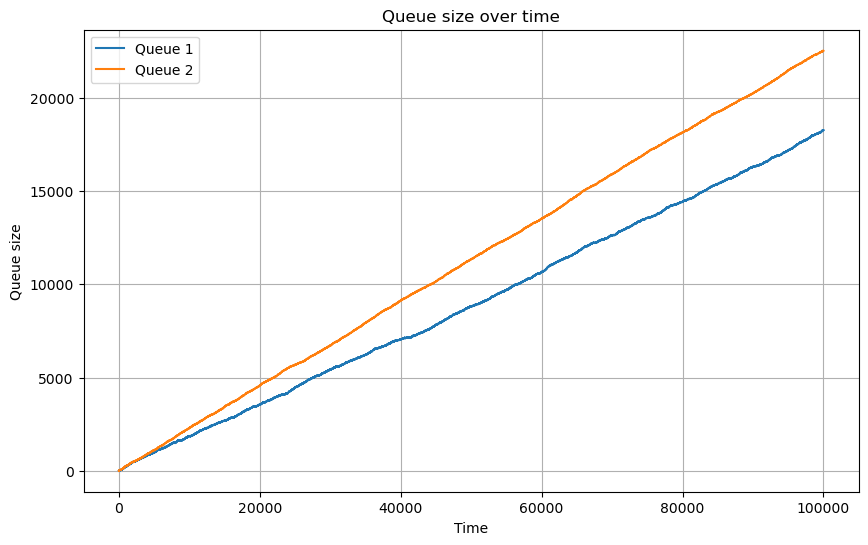

In [116]:
# Initialize parameters
T = 100000  # Number of time steps
lambda_1 = 1.5  # Arrival rate for queue 1
lambda_2 = 0.7  # Arrival rate for queue 2

# Initialize queues
Q1 = np.zeros(T+1)
Q2 = np.zeros(T+1)

# Simulate the system
for t in range(T):
    # Generate arrivals (according to a Poisson process)
    a1_t = np.random.poisson(lambda_1)
    a2_t = np.random.poisson(lambda_2)
    
    # Generate data transferred

    RX1_Power = FadingChannel(TX1_Power, TX1_fading_samples) # Received power in RX1
    [SNR_RX1, Rate_RX1, Data_TX1] = calculate_transferred_data(RX1_Power, RX1_Noise_Power, TX1_Bandwidth, TX1_communication_time)
    Harvested_power_TX1 = calculate_harvested_power(Harvesting_power_TX1, EH_eta, EH_fading_samples) # harvested energy at TX2
    RX2_Power = FadingChannel(Harvested_power_TX1, TX2_fading_samples) # Received power in RX1
    [SNR_RX2, Rate_RX2, Data_TX2] = calculate_transferred_data(RX2_Power, RX2_Noise_Power, TX2_Bandwidth, TX2_communication_time)

    D1_t = Data_TX1  # data transferred for queue 1
    D2_t = Data_TX2  # data transferred for queue 2
    
    # Update queues
    Q1[t+1] = Q1[t] - D1_t + a1_t
    Q2[t+1] = Q2[t] - D2_t + a2_t

# Plotting the queues over time
import matplotlib.pyplot as plt

time = np.arange(T+1)

plt.figure(figsize=(10, 6))
plt.plot(time, Q1, label='Queue 1')
plt.plot(time, Q2, label='Queue 2')
plt.xlabel('Time')
plt.ylabel('Queue size')
plt.title('Queue size over time')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
10 * math.log10(SNR_RX2)

2.8693473449925175